In [37]:
# importing data manipulation tools
import pandas as pd
import numpy as np
import pickle
from collections import Counter

# model metrics and performance lib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, plot_roc_curve

# model preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

# sklearn library for data imbalance
from imblearn.over_sampling import SMOTE

# model algorithsm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# data visualization
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

**Data Understanding**

In [38]:
# loading dataset
df = pd.read_csv('train.csv')

In [39]:
# Return the first `n` rows.
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [40]:
# Return a tuple representing the dimensionality of the DataFrame.
df.shape

(67463, 35)

In [41]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Home Ownership                67463 non-null  object 
 10  Employment Duration           67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [42]:
# returns number of missing value
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [43]:
# Return a Series containing counts of unique rows in the DataFrame.
df['Loan Status'].value_counts()

# Datasets is highly imbalance

0    61222
1     6241
Name: Loan Status, dtype: int64

In [44]:
# Return a Series containing counts of unique rows in the DataFrame.
df['Verification Status'].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

In [45]:
# Return a Series containing counts of unique rows in the DataFrame.
df['Home Ownership'].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Home Ownership, dtype: int64

**Data Analysis**

<AxesSubplot:title={'center':"Customer's Loan Status."}, xlabel='Loan Status', ylabel='count'>

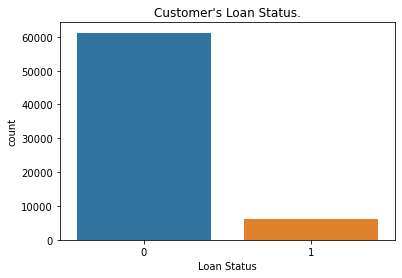

In [46]:
plt.title("Customer's Loan Status.")
sns.countplot(data=df, x='Loan Status')

<AxesSubplot:title={'center':"Customer's Home Ownership by Loan Status."}, xlabel='Home Ownership', ylabel='count'>

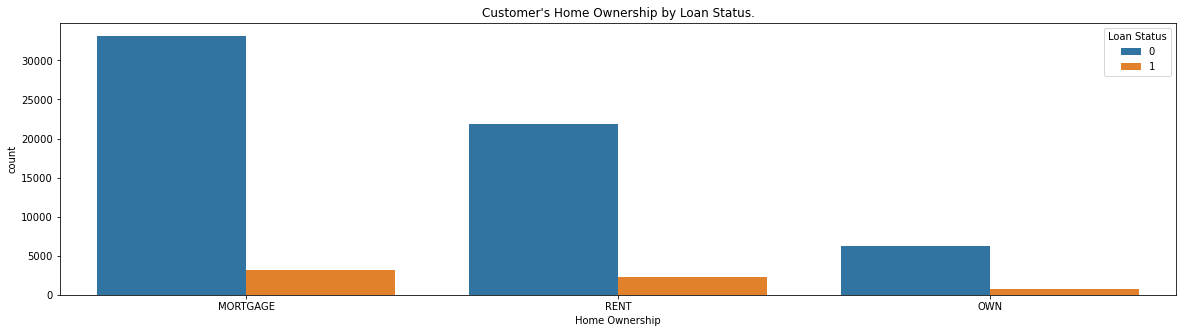

In [47]:
# plotting region

plt.figure(figsize=(20,5))
plt.title("Customer's Home Ownership by Loan Status.")
sns.countplot(data=df, x='Home Ownership', hue='Loan Status')

<AxesSubplot:title={'center':'Customers Verify Status by Loan Status.'}, xlabel='Verification Status', ylabel='count'>

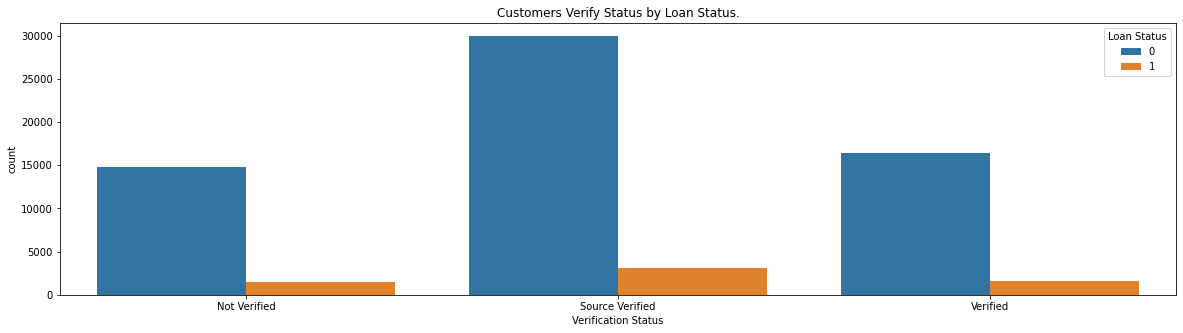

In [48]:
plt.figure(figsize=(20,5))
plt.title("Customers Verify Status by Loan Status.")
sns.countplot(data=df, x='Verification Status', hue='Loan Status')

<AxesSubplot:title={'center':"Customer's Home OwnerShip."}, xlabel='Home Ownership', ylabel='count'>

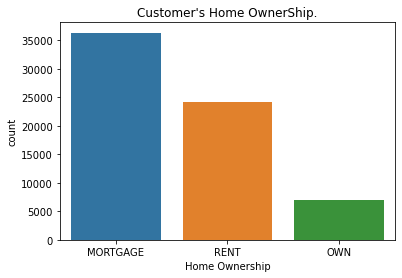

In [49]:
plt.title("Customer's Home OwnerShip.")
sns.countplot(data=df, x='Home Ownership')

<AxesSubplot:title={'center':"Customer's Delinquency in last two years."}, xlabel='Delinquency - two years', ylabel='count'>

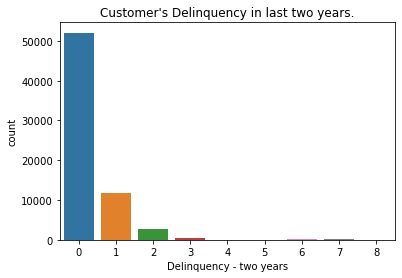

In [50]:
plt.title("Customer's Delinquency in last two years.")
sns.countplot(data=df, x='Delinquency - two years')

In [51]:
# Generate a profile report from a Dataset
#profile = ProfileReport(df=df, explorative=True)
#profile.to_widgets()

**Data Cleaning and Preprocessing**

In [52]:
# Drop specified labels from rows or columns.
df = df.drop(['ID'], axis=1)

In [53]:
#num_col = df.select_dtypes(include=['float64', 'int64'])
#cat_col = df.select_dtypes("O")

In [54]:
#scale = LabelEncoder().fit_transform(cat_col)
#nw_scale = pd.DataFrame(scale, columns=['Batch Enrolled', 'Grade', 'Sub Grade', 'Homer Ownership', 'Verification Status',
 #                                       'Payment Plan', 'Loan Title','Initial List Status', 'Application Type'])

#new_df = pd.concat([num_col, nw_scale], axis=1)
#new_df.head()

In [55]:
# Encode target labels
df['Batch Enrolled'] = LabelEncoder().fit_transform(df['Batch Enrolled'])
df['Grade'] = LabelEncoder().fit_transform(df['Grade'])
df['Sub Grade'] = LabelEncoder().fit_transform(df['Sub Grade'])
df['Home Ownership'] = LabelEncoder().fit_transform(df['Home Ownership'])
df['Verification Status'] = LabelEncoder().fit_transform(df['Verification Status'])
df['Payment Plan'] = LabelEncoder().fit_transform(df['Payment Plan'])
df['Loan Title'] = LabelEncoder().fit_transform(df['Loan Title'])
df['Initial List Status'] = LabelEncoder().fit_transform(df['Initial List Status'])
df['Application Type'] = LabelEncoder().fit_transform(df['Application Type'])

In [56]:
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0,0,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0,0,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0,0,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0,0,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0,0,18,0,430,126029,22579,0


**model development**

In [57]:
# assign feature i.e independent variable to X and target variable to y i.e dependent
X = df.drop(['Loan Status'], axis=1)
y = df['Loan Status']

In [58]:
# Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=41)

In [59]:
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.907483
1    0.092517
Name: Loan Status, dtype: float64
0    0.907505
1    0.092495
Name: Loan Status, dtype: float64


In [60]:
# Scale features using statistics that are robust to outliers.
mn = MinMaxScaler()
# Fit to data, then transform it train data
#X = mn.fit_transform(X)

In [61]:
# Fit to data, then transform it train data
x_train = mn.fit_transform(x_train)
# Fit to data, then transform it test data
x_test = mn.fit_transform(x_test)

**Handling Data Imbalance Using SMOTE Techniques**

In [62]:
# Handling data imbalance using sklearn in-built library SMOTE.

# Class to perform over-sampling using SMOTE..
nms = SMOTE()
# Resample the dataset.
x_train_sm, y_train_sm = nms.fit_resample(x_train, y_train)

print("Original Datasets Shape: ", Counter(y_train))
print("Resample Datasets Shape: ", Counter(y_train_sm))

Original Datasets Shape:  Counter({0: 42855, 1: 4369})
Resample Datasets Shape:  Counter({0: 42855, 1: 42855})


In [63]:
print(x_train_sm.shape)
print(x_test.shape)
print(y_train_sm.shape)
print(y_test.shape)

(85710, 33)
(20239, 33)
(85710,)
(20239,)


**Model Development Using Simple Regression Algorithm**

In [64]:
# Pipeline of transforms with a final estimator.
pipe = Pipeline([
    ('select', PCA(n_components='mle', svd_solver='full')),
    # Logistic Regression (aka logit, MaxEnt) classifier.
    ('lg', LogisticRegression(dual=False, class_weight='balanced', tol=1e-10, solver='lbfgs', multi_class='ovr'))
])
# Fit all the transformers one after the other and transform the data.
pipe.fit(x_train_sm, y_train_sm)

Pipeline(steps=[('select', PCA(n_components='mle', svd_solver='full')),
                ('lg',
                 LogisticRegression(class_weight='balanced', multi_class='ovr',
                                    tol=1e-10))])

In [65]:
# Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=2014)

# specifying parameter for optimal search
parameter = {
    'lg__max_iter' : [10000, 30000, 25000]
}

# Exhaustive search over specified parameter values for an estimator.
grid_search = GridSearchCV(estimator=pipe, param_grid=parameter, cv=cv, scoring='accuracy', verbose=False)
# Run fit with all sets of parameters.
grid_search.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=2014, shuffle=True),
             estimator=Pipeline(steps=[('select',
                                        PCA(n_components='mle',
                                            svd_solver='full')),
                                       ('lg',
                                        LogisticRegression(class_weight='balanced',
                                                           multi_class='ovr',
                                                           tol=1e-10))]),
             param_grid={'lg__max_iter': [10000, 30000, 25000]},
             scoring='accuracy', verbose=False)

In [66]:
# Call predict on the estimator with the best found parameters.
ypred = grid_search.predict(x_test)

In [67]:
# Compute the F1 score, also known as balanced F-score or F-measure.
print("F1 Score: {:.3f}".format(f1_score(y_test, ypred)))
# Accuracy classification score
print("Accuracy Score: {:.3f}".format(accuracy_score(y_test, ypred)))

F1 Score: 0.157
Accuracy Score: 0.533


In [68]:
# Build a text report showing the main classification metrics.
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68     18367
           1       0.09      0.47      0.16      1872

    accuracy                           0.53     20239
   macro avg       0.50      0.50      0.42     20239
weighted avg       0.83      0.53      0.63     20239



In [69]:
# Compute confusion matrix to evaluate the accuracy of a classification.
confusion_matrix(y_test, ypred)

array([[9918, 8449],
       [ 993,  879]], dtype=int64)

C:\Users\Silas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


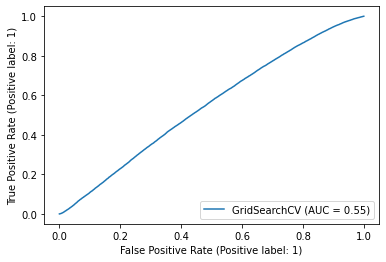

In [70]:
# Plot Receiver operating characteristic (ROC) curve.
plot_roc_curve(grid_search, x_train_sm, y_train_sm)

**Model Development using Gradient Boosting**

In [72]:
# Pipeline of transforms with a final estimator.
pipe = Pipeline([
    ('select', PCA(n_components='mle', svd_solver='full')),
    # Implementation of the scikit-learn API for XGBoost classification.
    ('xgb', XGBClassifier(use_label_encoder=False, booster='dart', max_depth=9))
])
# Fit all the transformers one after the other and transform the data.
pipe.fit(x_train_sm, y_train_sm)

[20:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('select', PCA(n_components='mle', svd_solver='full')),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='dart',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=9, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=2, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [ ]:
# Stratified K-Folds cross-validator
stk = StratifiedKFold(n_splits=6, shuffle=True, random_state=2014)

# specifying parameter for optimal search
param = {
    'xgb__n_estimators' : [40, 50, 70]
}

# Exhaustive search over specified parameter values for an estimator.
grid = GridSearchCV(estimator=pipe, param_grid=param, cv=stk, scoring='accuracy', verbose=False)
# Run fit with all sets of parameters.
grid.fit(x_train_sm, y_train_sm)

[21:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# Call predict on the estimator with the best found parameters.
y_true = grid.predict(x_test)

In [ ]:
# Compute the F1 score, also known as balanced F-score or F-measure.
print("F1 Score: {:.3f}".format(f1_score(y_test, y_true)))
# Accuracy classification score
print("Accuracy Socre: {:.3f}".format(accuracy_score(y_test, y_true)))

In [ ]:
# Build a text report showing the main classification metrics.
print(classification_report(y_test, y_true))

In [ ]:
# Compute confusion matrix to evaluate the accuracy of a classification.
confusion_matrix(y_test, y_true)

In [ ]:
# Plot Receiver operating characteristic (ROC) curve.
plot_roc_curve(grid, x_train_sm, y_train_sm)

In [ ]:
x

In [ ]:
# Saving model to disk
filename = 'SoccerFeverModel.pkl'

with open(filename, 'wb') as file:
    pickle.dump(grid, file)

In [ ]:
# loading save model
with open(filename, 'rb') as file:
    load_model = pickle.load(file)

In [ ]:
# loading dataset
test_data = pd.read_csv('test.csv')

In [ ]:
# Drop specified labels from rows or columns.
test_data = test_data.drop(['ID', 'Loan Status'], axis=1)

In [ ]:
test_data.isnull().sum()

In [ ]:
#num_co_test = test_data.select_dtypes(include=['float64', 'int64'])
#cat_col_test = test_data.select_dtypes("O")

In [ ]:
#scale_test = LabelEncoder().fit_transform(cat_col_test)
#nw_scale_tst = pd.DataFrame(scale_test, columns=['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership', 'Verification Status',
 #                                                'Payment Plan', 'Loan Title','Initial List Status', 'Application Type'])

#new_fd = pd.concat([num_co_test, nw_scale_tst], axis=1)
#new_fd.head()

In [ ]:
# Encode target labels
test_data['Batch Enrolled'] = LabelEncoder().fit_transform(test_data['Batch Enrolled'])
test_data['Grade'] = LabelEncoder().fit_transform(test_data['Grade'])
test_data['Sub Grade'] = LabelEncoder().fit_transform(test_data['Sub Grade'])
test_data['Home OwnerShip'] = LabelEncoder().fit_transform(test_data['Home OwnerShip'])
test_data['Verification Status'] = LabelEncoder().fit_transform(test_data['Verification Status'])
test_data['Payment Plan'] = LabelEncoder().fit_transform(test_data['Payment Plan'])
test_data['Loan Title'] = LabelEncoder().fit_transform(test_data['Loan Title'])
test_data['Initial List Status'] = LabelEncoder().fit_transform(test_data['Initial List Status'])
test_data['Application Type'] = LabelEncoder().fit_transform(test_data['Application Type'])

In [ ]:
# Scale features using statistics that are robust to outliers.
mn = MinMaxScaler()
# Fit to data, then transform it train data
test_data = mn.fit_transform(test_data)

In [ ]:
# Call predict on the estimator with the best found parameters.
unseen_pred = grid_search.predict(test_data)

In [ ]:
un_sub = pd.read_csv('submission.csv')

In [ ]:
# Constructing DataFrame
un_sub['Loan Status'] = pd.DataFrame(unseen_pred)

In [ ]:
un_sub = un_sub.to_csv('submission.csv', index=False)

In [ ]:
un_sub.value_counts()